In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


In [2]:
data = pd.read_csv('Problem1.txt', delimiter='\t')
print(data.head())
print(data.shape)

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
3            2   mandarin      mandarin    86    6.2     4.7         0.80
4            2   mandarin      mandarin    84    6.0     4.6         0.79
(59, 7)


In [3]:
print(data.fruit_name.unique())
print(data.fruit_label.unique())

['apple' 'mandarin' 'orange' 'lemon']
[1 2 3 4]


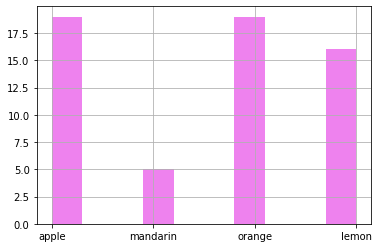

In [4]:
fruitCountHist = data['fruit_name'].hist(color = 'violet')

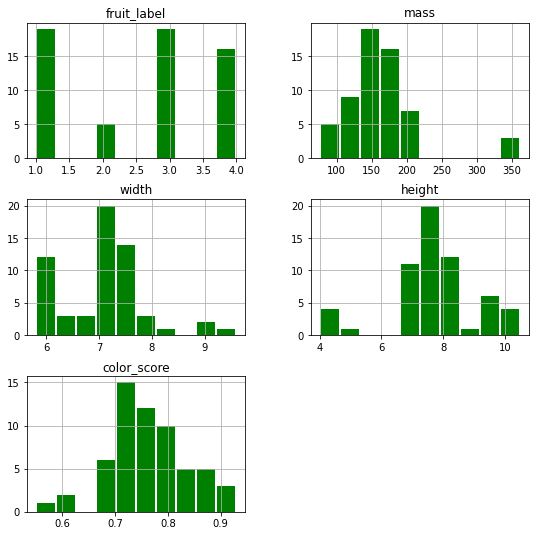

In [5]:
hist = data.hist(rwidth = 0.9, color = 'green', figsize = (9, 9))

In [6]:
# fruit_name and fruit_subtype are not required for training as just they are additional info

Accuracy of KNN Classifier on training set : 0.9361702127659575
Accuracy of KNN Classifier on test set : 0.75
Accuracy of Logistic Regression Classifier on training set : 0.7872340425531915
Accuracy of Logistic Regression on test set : 0.5833333333333334

  Classifier     Score
0        KNN  0.750000
1     LogReg  0.583333


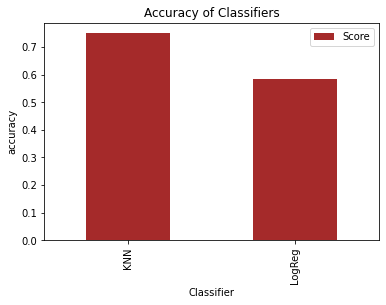

In [7]:
features = ['mass', 'width', 'height', 'color_score']

X = data[features]
y = data.fruit_label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Accuracy of KNN Classifier on training set :", knn.score(X_train, y_train))
print("Accuracy of KNN Classifier on test set :", knn.score(X_test, y_test))

logReg = LogisticRegression()

logReg.fit(X_train, y_train)

print("Accuracy of Logistic Regression Classifier on training set :", logReg.score(X_train, y_train))
print("Accuracy of Logistic Regression on test set :", logReg.score(X_test, y_test))

print()
scores = pd.DataFrame({'Classifier' : ['KNN', 'LogReg'], 'Score' : [knn.score(X_test, y_test), logReg.score(X_test, y_test)]})
print(scores)

compare = scores.plot.bar('Classifier', 'Score', color = 'brown', title = "Accuracy of Classifiers", ylabel = "accuracy")

In [8]:
# we can see that the KNeighborClassifier performs well than the LogisticRegressionModel.